In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('/workspaces/Mobile-Price-Classification/data/train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df['price_range'].unique()

array([1, 2, 3, 0])

<function matplotlib.pyplot.show(close=None, block=None)>

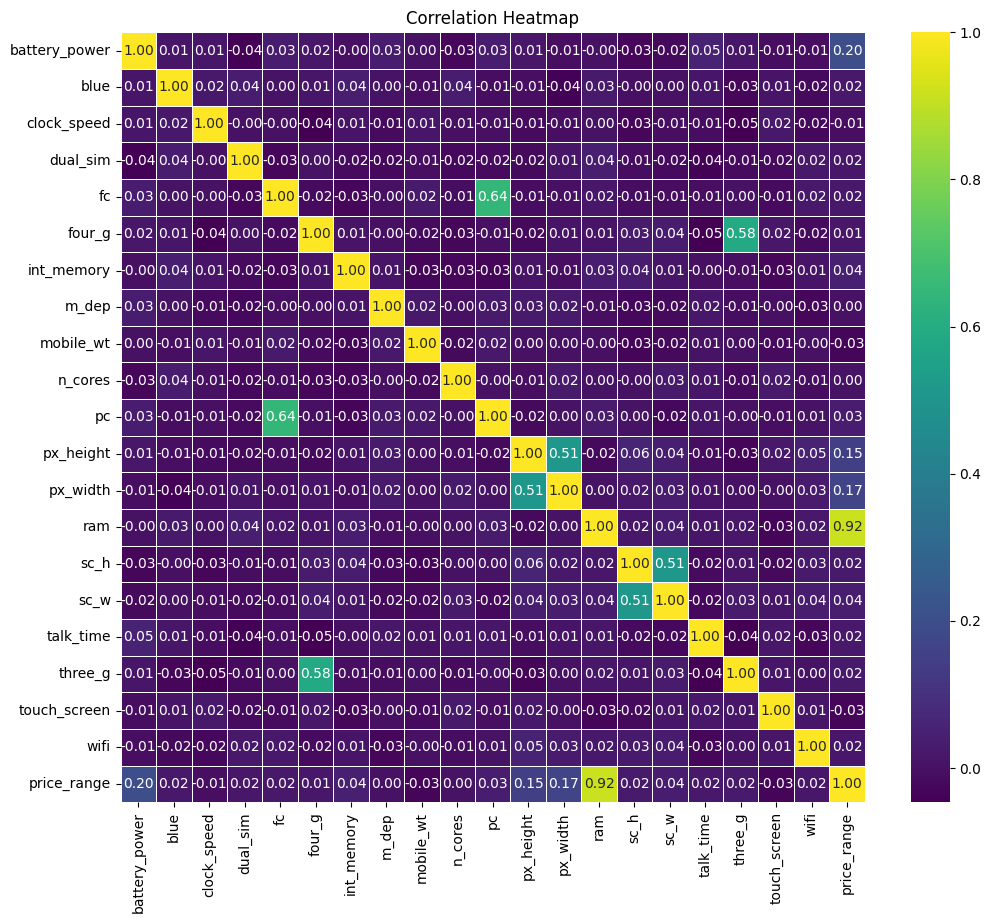

In [7]:
plt.figure(figsize=(12,10))
correlation_matrix =df.corr()
sns.heatmap(correlation_matrix ,annot=True ,fmt='.2f' ,cmap='viridis' ,linewidth =0.5)
plt.title('Correlation Heatmap')
plt.show

Here the correlation matrix shows that  price range show positive correlation with all labels excluding touch_screen, mobile_wt and clock_speed 

So we remove those

In [8]:
df = df.drop(columns=['touch_screen','mobile_wt','clock_speed'])

In [9]:
df.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
0,842,0,0,1,0,7,0.6,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,1,0,1,53,0.7,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,1,2,1,41,0.9,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,0,0,0,10,0.8,6,9,1216,1786,2769,16,8,11,1,0,2
4,1821,1,0,13,1,44,0.6,2,14,1208,1212,1411,8,2,15,1,0,1


Feature engineering attributes due to high dependency of ram in price range

In [10]:
'''df['px_area'] = df['px_height'] * df['px_width']  # Total screen resolution
df['battery_per_core'] = df['battery_power'] / df['n_cores']  # Battery per CPU core
df['memory_density'] = df['ram'] / df['int_memory']  # RAM-to-storage ratio'''

"df['px_area'] = df['px_height'] * df['px_width']  # Total screen resolution\ndf['battery_per_core'] = df['battery_power'] / df['n_cores']  # Battery per CPU core\ndf['memory_density'] = df['ram'] / df['int_memory']  # RAM-to-storage ratio"

In [11]:
'''df['ram'] = np.log(df['ram']) / np.log(2)  # Log base 2 to further compress RAM values'''

"df['ram'] = np.log(df['ram']) / np.log(2)  # Log base 2 to further compress RAM values"

<function matplotlib.pyplot.show(close=None, block=None)>

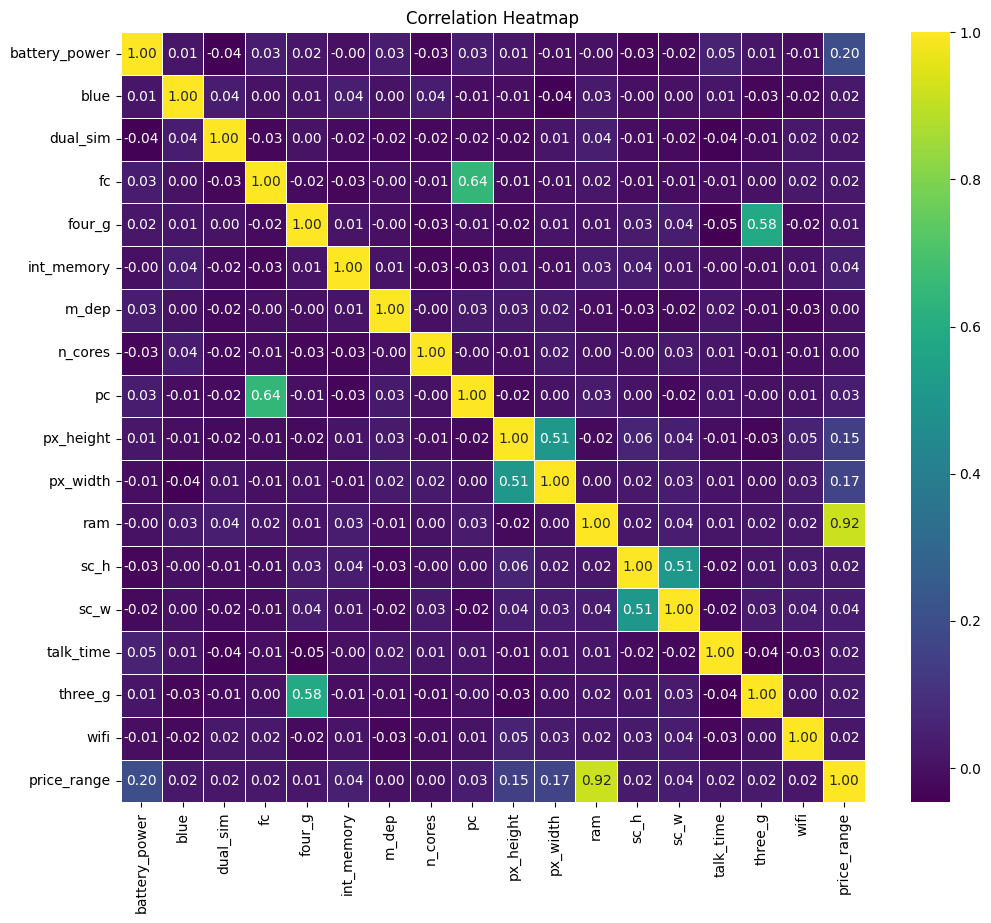

In [12]:
plt.figure(figsize=(12,10))
correlation_matrix =df.corr()
sns.heatmap(correlation_matrix ,annot=True ,fmt='.2f' ,cmap='viridis' ,linewidth =0.5)
plt.title('Correlation Heatmap')
plt.show

Setting x and y

In [13]:
y = df['price_range']

In [14]:
x = df[['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'wifi',
        
       ]]



In [52]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled

array([[0.22778891, 0.        , 0.        , ..., 0.94444444, 0.        ,
        1.        ],
       [0.34736139, 1.        , 1.        , ..., 0.27777778, 1.        ,
        0.        ],
       [0.04141617, 1.        , 1.        , ..., 0.38888889, 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 1.        , ..., 0.16666667, 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.        , ..., 0.94444444, 1.        ,
        1.        ],
       [0.00601202, 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ]], shape=(2000, 17))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

Logistic Regression

In [18]:
logmodel = LogisticRegression()

In [19]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred = logmodel.predict(X_test)

In [21]:
print(accuracy_score(y_test,y_pred))

0.9136363636363637


In [22]:
with open('logmodel.pkl','wb') as model_file:
    pickle.dump(logmodel,model_file)

Naive Bayes

In [ ]:
nbmodel = GaussianNB()

In [24]:
nbmodel.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred = nbmodel.predict(X_test)

In [26]:
print(accuracy_score(y_test,y_pred))

0.8015151515151515


In [27]:
with open('nbmodel.pkl','wb') as model_file:
    pickle.dump(nbmodel,model_file)

KNN

In [28]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 100)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x_scaled, y, cv=5).mean() for k in k_values]

optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K: {optimal_k}")

Optimal K: 96


In [29]:
knnmodel = KNeighborsClassifier(n_neighbors=42)

In [30]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [31]:
y_pred = knnmodel.predict(X_test)

In [32]:
print(accuracy_score(y_test,y_pred))

0.5333333333333333


In [33]:
with open('knn.pkl','wb') as model_file:
    pickle.dump(knnmodel,model_file)

Decision Tree

In [34]:
df['px_area'] = df['px_height'] * df['px_width']  # Total screen resolution
df['battery_per_core'] = df['battery_power'] / df['n_cores']  # Battery per CPU core
df['memory_density'] = df['ram'] / df['int_memory']  # RAM-to-storage ratio

In [35]:
df['ram'] = np.log(df['ram']) / np.log(2)  # Log base 2 to further compress RAM values

In [36]:
x = df[['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'wifi',
        'px_area', 'battery_per_core', 'memory_density'
       ]]

In [49]:
x.describe()

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,px_area,battery_per_core,memory_density
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,1238.518500,0.4950,0.509500,4.309500,0.521500,32.046500,0.501750,4.520500,9.916500,645.108000,1251.515500,10.788635,12.306500,5.767000,11.011000,0.761500,0.507000,9.052601e+05,422.343621,128.239282
std,439.418206,0.5001,0.500035,4.341444,0.499662,18.145715,0.288416,2.287837,6.064315,443.780811,432.199447,0.971792,4.213245,4.356398,5.463955,0.426273,0.500076,8.297625e+05,402.810193,199.129882
min,501.000000,0.0000,0.000000,0.000000,0.000000,2.000000,0.100000,1.000000,0.000000,0.000000,500.000000,8.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000e+00,63.875000,4.338983
25%,851.750000,0.0000,0.000000,1.000000,0.000000,16.000000,0.200000,3.000000,5.000000,282.750000,874.750000,10.237807,9.000000,2.000000,6.000000,1.000000,0.000000,2.632005e+05,180.830357,38.805727
50%,1226.000000,0.0000,1.000000,3.000000,1.000000,32.000000,0.500000,4.000000,10.000000,564.000000,1247.000000,11.067770,12.000000,5.000000,11.000000,1.000000,1.000000,6.013590e+05,273.708333,67.608403
75%,1615.250000,1.0000,1.000000,7.000000,1.000000,48.000000,0.800000,7.000000,15.000000,947.250000,1633.000000,11.581436,16.000000,9.000000,16.000000,1.000000,1.000000,1.359027e+06,488.500000,129.668956
max,1998.000000,1.0000,1.000000,19.000000,1.000000,64.000000,1.000000,8.000000,20.000000,1960.000000,1998.000000,11.965063,19.000000,18.000000,20.000000,1.000000,1.000000,3.886306e+06,1995.000000,1979.000000


In [37]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [39]:
dtmodel = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth = 20, min_samples_leaf=5, min_samples_split=10, max_features='log2')

In [40]:
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

In [41]:
y_pred = dtmodel.predict(X_test)

In [48]:
print(accuracy_score(y_test,y_pred))

0.6833333333333333


In [43]:
with open('decisiontree.pkl','wb') as model_file:
    pickle.dump(dtmodel,model_file)

In [44]:
test_inputs = [
    # battery_power, blue, dual_sim, fc, four_g, int_memory, m_dep, n_cores, 
    # pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, wifi, 
    # px_area, battery_per_core, memory_density
    [600, 0, 1, 2, 0, 8, 0.3, 2, 5, 400, 300, 500, 4, 2, 5, 0, 0, 
     400 * 300, 600 / 2, 500 / 8],  # Lower class (expected: 0-1)

    [1500, 1, 0, 10, 1, 32, 0.7, 6, 12, 1200, 800, 3000, 6, 4, 15, 1, 1, 
     1200 * 800, 1500 / 6, 3000 / 32],  # Higher class (expected: 2-3)
]

for test in test_inputs:
    test_scaled = scaler.transform([test])  # Apply same scaling as training
    prediction = dtmodel.predict(test_scaled)
    print(f"Predicted Class: {prediction[0]}")



Predicted Class: 2
Predicted Class: 3


/opt/conda/envs/mlenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/conda/envs/mlenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
unique_predictions = np.unique(dtmodel.predict(X_test))
print("Unique Predicted Classes:", unique_predictions)


Unique Predicted Classes: [0 1 2 3]


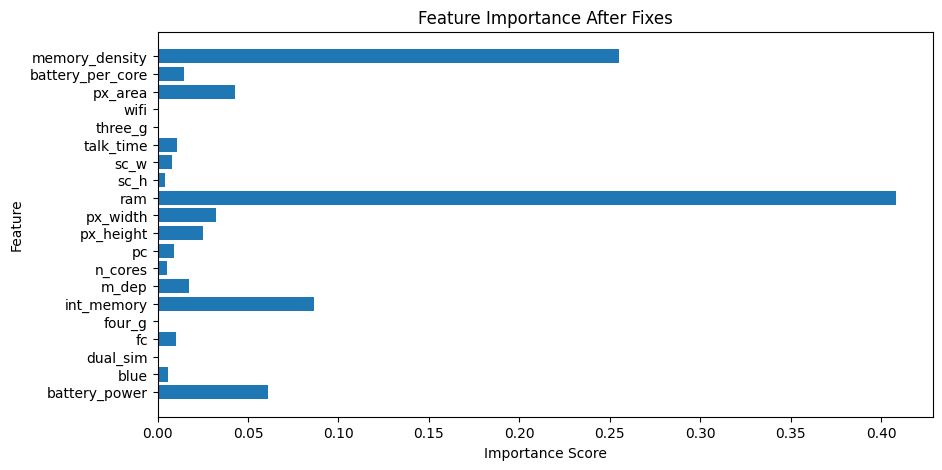

In [46]:
import matplotlib.pyplot as plt

feature_importances = dtmodel.feature_importances_
feature_names = x.columns  

plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance After Fixes")
plt.show()



In [47]:
feature_names = [
    "battery_power", "blue", "dual_sim", "fc", "four_g", "int_memory", "m_dep", 
    "talk_time", "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", 
    "three_g", "wifi", "px_area", "battery_per_core", "memory_density"
]

# Test inputs (now including the new derived features)
test_inputs = [
    [600, 0, 1, 2, 0, 8, 0.3, 2, 5, 400, 300, 500, 4, 2, 5, 0, 0, 120000, 300, 62.5],  # Lower class (0-1)
    [1500, 1, 0, 10, 1, 32, 0.7, 6, 12, 1200, 800, 3000, 6, 4, 15, 1, 1, 960000, 250, 93.75],  # Higher class (2-3)
]


# Ensure we use the exact same feature names and order as in training
test_df = pd.DataFrame(test_inputs, columns=feature_names)

# Reorder columns to match the scaler's learned feature order
test_df = test_df[scaler.feature_names_in_]  # Fixes the mismatch

# Apply the same scaler used during training
test_inputs_scaled = scaler.transform(test_df)

# Make predictions
for test in test_inputs_scaled:
    prediction = dtmodel.predict([test])
    print(f"Predicted Class: {prediction[0]}")



Predicted Class: 0
Predicted Class: 2
